# TP2 Álgebra Lineal Computacional

## Procesamiento de datos

1. Cargo el archivo "Tabla nutricional", lleno los datos nulos con 0 y modifico los valores para que todos estén en la misma unidad de medida (gr)

In [105]:
#Leo el archivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("tabla_nutricional.csv", encoding='latin_1',delimiter=';')

consumidores_libres = pd.read_csv("consumidores_libres.csv", encoding='latin_1',delimiter=';')
consumidores_libres

,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0
5,HUEVOS COLOR DOCENA,720,2200.0,2600.0,3000.0,3400.0,3800.0
6,PAN FRESCO,1000,1650.0,2100.0,2200.0,2300.0,2300.0
7,LECHE c/VIT.FORT,1000,1100.0,1210.0,1620.0,1890.0,1990.0
8,YERBA TARAGUI,1000,2800.0,3700.0,4600.0,4950.0,5500.0
9,ZANAHORIAS,1000,820.0,990.0,1100.0,1100.0,1100.0


In [106]:
#Completo con ceros
tn = df.fillna(0)
tn.head()

#Cambio todas las unidades de medida a gr
nuevosNombres = {}
for col in tn.columns:
    if "mg" in col:
        tn[col] = tn[col]/1000
    nuevosNombres[col] = col.replace('mg','gr')
tn = tn.rename(columns=nuevosNombres)
tn.head()

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.00,12.42,8.37,7.83,0.15390,0.28350,0.000189,0.0,4.99,2.19,0.520,0.0
1,Leche entera en polvo,11.00,4.51,2.84,2.73,0.04444,0.09900,0.000060,0.0,1.62,0.77,0.060,0.0
2,Yogurt,19.00,2.45,0.51,0.49,0.00799,0.01767,0.000005,0.0,0.32,0.14,0.014,0.0
3,Queso crema,1.66,0.06,0.10,0.37,0.00123,0.00093,0.000000,0.0,0.36,0.11,0.010,0.0
4,Queso cuartirolo,3.66,0.06,0.77,0.80,0.02084,0.01654,0.000000,0.0,0.76,0.21,0.020,0.0


2. Definimos la función cumpleMargen()

Podemos observar que nuestra tabla nutricional no cumple el margen de ingesta nutricional de la OMS

In [107]:
def cumpleMargen(data):
    cantidad = data[data.columns[1]].sum()
    proteinas = data[data.columns[3]].sum()
    grasas = data[data.columns[4]].sum()
    carbohidratos = data[data.columns[2]].sum()
    
    # 'dCELGA PAQUETE',
    # 'NARANJA',
    # 'MANZANA',
    # 'BOLA DE LOMO',
    # 'ASADO',
    # 'PALETA',
    # 'CARNE PICADA COMUN'

    sodio = data[data.columns[5]].sum()
        
    frutasYverduras = data.loc[data['Alimento'].isin(["Acelga","Zanahoria","Tomate","Lechuga","Cebolla","Zapallo","Manzana","Naranja","Mandarina","pera","Banana","Papa","Batata","Tomate envasado"])]
    frutVer = frutasYverduras[frutasYverduras.columns[1]].sum()

    fibras = data[data.columns[12]].sum()
    
    res = True
    if (grasas < cantidad * 0.15) or (grasas > cantidad * 0.30):
        res = False
    elif (carbohidratos < cantidad * 0.55) or (carbohidratos > cantidad * 0.75):
        res = False
    elif(proteinas < cantidad * 0.10) or (proteinas > cantidad * 0.15):
        res = False
    elif (sodio < 200):
        res = False
    elif (fibras < 25):
        res = False
    elif (frutVer < 400):
        res = False
    return res

print("Cumple margen (tabla nutricional):",cumpleMargen(tn))

Cumple margen (tabla nutricional): False


3. Realizamos un ACP con los datos de la tabla nutricional

In [108]:
# Modifico la tabla para que me muestre los nutrientes por gramo

cantidades = tn[tn.columns[1]]
tn0 = tn.copy()
for i in range(tn.shape[0]):
    tn0.iloc[i,1:] = tn0.iloc[i,1:]/cantidades[i]

# Divido la tabla por tipo de alimento

Azucarados = tn0[tn0["Azucares Libres (gr)"]>0.5]["Alimento"]
pocoHC = tn0[(tn0["HC (gr)"]<0.3) & (tn0["Grasas (gr)"]<0.7)]["Alimento"]


tnAzucarados = tn0.loc[tn0['Alimento'].isin(Azucarados)]
tnPocoHC = tn0.loc[tn0['Alimento'].isin(pocoHC)]


tnResto = tn0.loc[~tn0['Alimento'].isin(Azucarados)]
tnResto = tnResto.loc[~tn0['Alimento'].isin(pocoHC)]

In [109]:
#

tnMedias = np.mean(tn0.iloc[:,2:], axis=0)

tnCentrado = tn0.iloc[:,2:]
for i in range(tnCentrado.shape[1]):
    tnCentrado[tnCentrado.columns[i]] = tnCentrado[tnCentrado.columns[i]] - tnMedias[i]

# 

tnRestoCentrado = tnResto.iloc[:,2:]
for i in range(tnRestoCentrado.shape[1]):
    tnRestoCentrado[tnRestoCentrado.columns[i]] = tnRestoCentrado[tnRestoCentrado.columns[i]] - tnMedias[i]

tnAzucaradosCentrado = tnAzucarados.iloc[:,2:]
for i in range(tnAzucaradosCentrado.shape[1]):
    tnAzucaradosCentrado[tnAzucaradosCentrado.columns[i]] = tnAzucaradosCentrado[tnAzucaradosCentrado.columns[i]] - tnMedias[i]

tnpocoHCentrado = tnPocoHC.iloc[:,2:]
for i in range(tnpocoHCentrado.shape[1]):
    tnpocoHCentrado[tnpocoHCentrado.columns[i]] = tnpocoHCentrado[tnpocoHCentrado.columns[i]] - tnMedias[i]

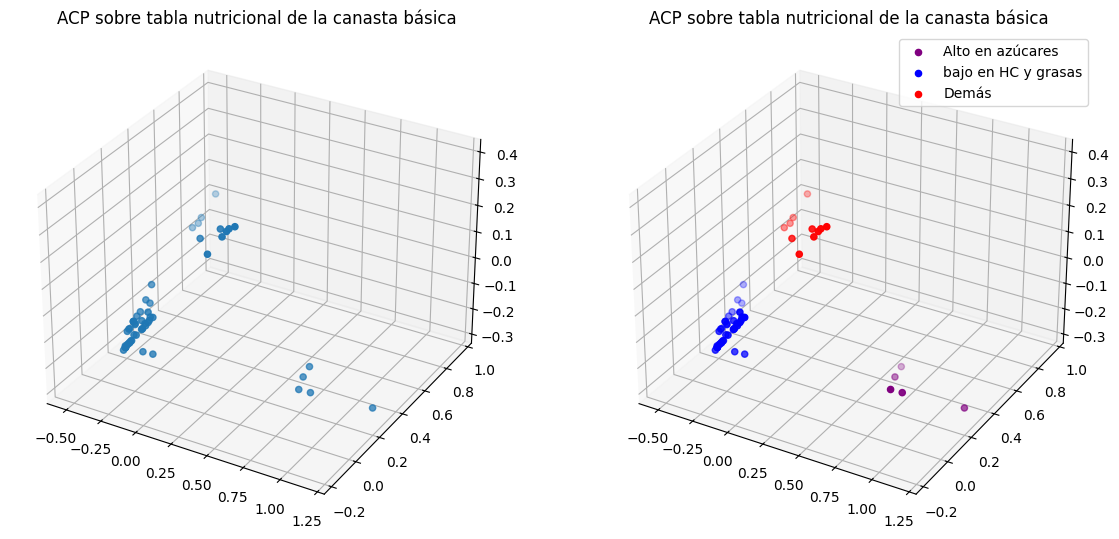

In [110]:
#
U, S, Vt = np.linalg.svd(tnCentrado)
V_reducido = Vt[:3,:]

tnProyecciones = np.dot(tnCentrado,V_reducido.T)

tnAzucaradosProyecciones = np.dot(tnAzucaradosCentrado,V_reducido.T)
tnPocoHCProyecciones = np.dot(tnpocoHCentrado,V_reducido.T)
tnProyeccionesResto = np.dot(tnRestoCentrado,V_reducido.T)

fig = plt.figure(figsize=(14,28))
ax = fig.add_subplot(121,projection='3d')
ax.scatter(tnProyecciones[:,0],tnProyecciones[:,1],tnProyecciones[:,2])
ax.set_title("ACP sobre tabla nutricional de la canasta básica")

ax = fig.add_subplot(122,projection='3d')
ax.scatter(tnAzucaradosProyecciones[:,0],tnAzucaradosProyecciones[:,1],tnAzucaradosProyecciones[:,2],color="purple", label = "Alto en azúcares")
ax.scatter(tnPocoHCProyecciones[:,0],tnPocoHCProyecciones[:,1],tnPocoHCProyecciones[:,2],color="blue", label = "bajo en HC y grasas")
ax.scatter(tnProyeccionesResto[:,0],tnProyeccionesResto[:,1],tnProyeccionesResto[:,2], color = "red", label = "Demás")
ax.set_title("ACP sobre tabla nutricional de la canasta básica")
ax.legend()
plt.show()


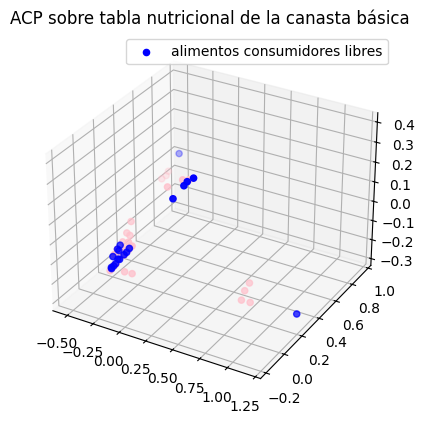

In [111]:
#Elementos de la tabla consumidores_libres
alim_cl = consumidores_libres["PRODUCTOS"].tolist()
#Reemplazo los nombres para que coincidan con los de la tabla nutricional
alim_cl[0] = "Aceite girasol"
alim_cl[1] = "Arroz"
alim_cl[2] = "Azucar"
alim_cl[3] = "Fideos secos"
alim_cl[4] = "Harina trigo"
alim_cl[5] = "Huevo" #En el precio hace referencia a la docena y en la tabla nutricional a los 16 huevos, para pensar
alim_cl[6] = "Pan Frances"
alim_cl[7] = "Leche fluida entera"
alim_cl[8] = "Yerba"
alim_cl[9] = "Zanahoria"
alim_cl[10] = "Berenjena" #No hay berenjena en la tabla nutricional ???
alim_cl[11] = "Tomate"
alim_cl[12] = "Cebolla"
alim_cl[13] = "Papa"
alim_cl[14] = "Acelga"
alim_cl[15] = "Naranja"
alim_cl[16] = "Manzana"
alim_cl[17] = "Bola de Lomo"
alim_cl[18] = "Asado"
alim_cl[19] = "Paleta"
alim_cl[20] = "Carne picada"


#DataFrame con los datos nutricionales de los elementos de la tabla consumidores_libres
cl = tn0.loc[tn0['Alimento'].isin(alim_cl)]
tnResto = tn0.loc[~tn0['Alimento'].isin(alim_cl)]

#Matriz del DataFrame
clCentrado = cl.iloc[:,2:]

for i in range(clCentrado.shape[1]):
    clCentrado[clCentrado.columns[i]] = clCentrado[clCentrado.columns[i]] - tnMedias[i]

tnRestoCentrado = tnResto.iloc[:,2:]
for i in range(tnRestoCentrado.shape[1]):
    tnRestoCentrado[tnRestoCentrado.columns[i]] = tnRestoCentrado[tnRestoCentrado.columns[i]] - tnMedias[i]

proyec = np.dot(clCentrado,V_reducido.T)
tnProyeccionesResto = np.dot(tnRestoCentrado,V_reducido.T)

#Gráfico
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(proyec[:,0],proyec[:,1],proyec[:,2],color = "blue", label = "alimentos consumidores libres")
ax.scatter(tnProyeccionesResto[:,0],tnProyeccionesResto[:,1],tnProyeccionesResto[:,2], color = "pink")
ax.set_title("ACP sobre tabla nutricional de la canasta básica")
ax.legend()
plt.show()

## Consigna 6:

In [112]:
# Modifico la tabla para que me muestre los nutrientes por gramo

cantidades = consumidores_libres[consumidores_libres.columns[1]]
cl = consumidores_libres.copy()
for i in range(cl.shape[0]):
    cl.iloc[i,1:] = cl.iloc[i,1:]/cantidades[i]


In [113]:
precios = cl[cl.columns[2]]

for i in range(cl.shape[0]):
    for j in range(3,7):
        cl.iloc[i,j] = (cl.iloc[i,j]/precios[i])
    cl.iloc[i,2] = 1


In [114]:
frutas_verduras_cl = cl[8:17]

frutas_verduras_promedios = []
for i in range(2,7):
    frutas_verduras_promedios.append(frutas_verduras_cl.iloc[:,i].mean())


carnes_cl = cl[17:21]

carnes_promedios = []
for i in range(2,7):
    carnes_promedios.append(carnes_cl.iloc[:,i].mean())


In [115]:
# Data aportada por Matías

# %% Ahora realizaremos la regresión lineal

# ¿Qué es la regresión lineal?
# La regresión lineal es un método estadístico utilizado para modelar la relación
# entre una variable dependiente y una o más variables independientes.
# Su objetivo es encontrar la línea que mejor representa la relación entre las variables.
# Más específicamente, determina la línea y = c_0 + c_1 * x
# tal que la suma de las distancias al cuadrado (residuales) desde los puntos observados
# hasta sus puntos proyectados en esta línea de regresión sea minimizada.

# ¿Cómo la calculamos?
# Utilizaremos las ecuaciones normales para la regresión lineal, que son:
# (X^T X) β = X^T y
# Aquí, X es la matriz de diseño que contiene las variables independientes,
# y es el vector de respuesta que contiene las variables dependientes,
# y β es el vector de coeficientes que queremos calcular.

# Para derivar estas ecuaciones, empezamos minimizando la suma de los cuadrados de los errores:
# Minimizar ||Xβ - y||^2.
# Al derivar con respecto a β y establecer el gradiente a cero, obtenemos:
# ∇(Xβ - y)^T (Xβ - y) = 0
# Esto conduce a las ecuaciones normales (X^T X) β = X^T y.

# Dividimos el problema en dos partes: 
# 1. Calcular X^T X
# 2. Calcular X^T y

# ¿Por qué funciona esto?
# Estas ecuaciones normales provienen de la minimización del error cuadrático medio,
# lo que garantiza que estamos encontrando la línea que mejor se ajusta a los datos.

# ¿Cómo resolvemos (X^T X) β = X^T y?
# Utilizaremos eliminación gaussiana, un método sistemático para resolver sistemas de ecuaciones lineales.
# Este método transforma el sistema en una forma escalonada, de la cual podemos resolver las incógnitas
# de manera directa.

In [116]:
def minimosCuadrados(X,Y):
    X_t = np.transpose(X)
    A = X_t @ X
    b = X_t @ Y
    c = np.linalg.solve(A,b)
    return c

X = np.array([[1,0],[1,1],[1,2],[1,3],[1,4]])
x = minimosCuadrados(X,frutas_verduras_promedios)
x

array([0.93452281, 0.33746726])

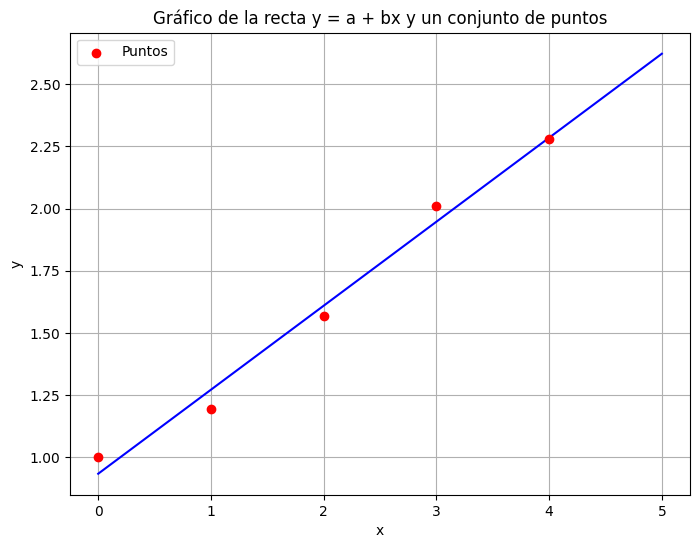

In [117]:
a = x[0]
b = x[1]

# Generar valores de x para la recta
r = np.linspace(0, 5, 100)
y_line = a + b * r

# Definir el conjunto de puntos
points_x = np.array([0, 1, 2, 3, 4])
points_y = np.array(frutas_verduras_promedios)

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Graficar la recta y = a + bx
plt.plot(r, y_line, color='blue')

# Graficar los puntos
plt.scatter(points_x, points_y, color='red', label='Puntos', zorder=5)

# Añadir etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de la recta y = a + bx y un conjunto de puntos')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()